## Spam Detection System

### Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')

### Looking inside data

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Now dropping the unnamed label

In [4]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

### We can see that out of 5571 data 4825 are ham and 747 are spam

### Lets add new feature Length of message  to check its connection with spam

In [7]:
data['length'] = data['v2'].apply(len)

In [8]:
data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


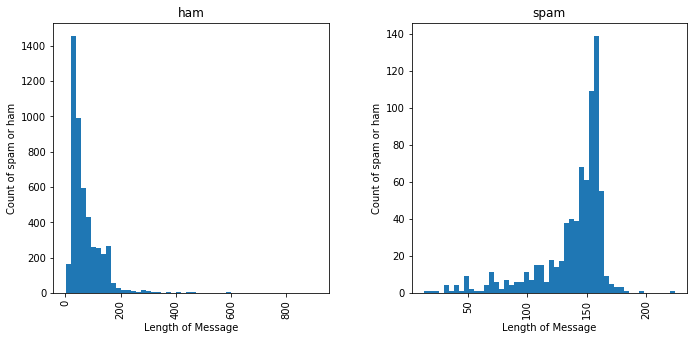

In [9]:
axarr = data.hist(column='length', by='v1', bins=50,figsize=(11,5))
# ax.set(xlabel="Length of Message", ylabel="Count of spam or ham")
for ax in axarr.flatten():
    ax.set_xlabel("Length of Message")
    ax.set_ylabel("Count of spam or ham")

### Looks like the lengthy is the message, more likely it is a spam

### Data Pre-Processing

In [10]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
from nltk.corpus import stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Creating new dataset to copy on later

In [13]:
text_proc = data['v2'].copy()

In [14]:
text_proc.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

### Lets remove any punctuation and stopwords.

In [15]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [16]:
text_proc = text_proc.apply(text_process)

In [17]:
%%time
vectorizer_CVT = CountVectorizer("english")
features_CVT = vectorizer_CVT.fit_transform(text_proc)

Wall time: 95.5 ms


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Classification and Prediction with  Naive Bayes   using Count Vectorizer only

In [21]:
Models = []
ACC = []

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features_CVT, data['v1'], test_size=0.33, random_state=111)

In [23]:
MNB_CVT = MultinomialNB()
MNB_CVT.fit(X_train,Y_train)
Y_predict = MNB_CVT.predict(X_test)
print('Accuracy of model is :')
print(accuracy_score(Y_predict,Y_test))

Accuracy of model is :
0.9798803697661773


Confusion matrix, without normalization
[[1558   12]
 [  25  244]]


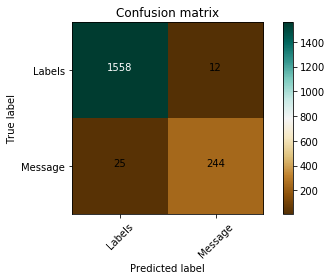

In [24]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

In [25]:
Models.append('Naive Bayes')
ACC.append(accuracy_score(Y_predict,Y_test))

### Classification and Prediction with  Naive Bayes   using TF-IDF  only

In [26]:
text_proc = text_proc.apply(text_process)

In [29]:
%%time
vectorizer_IDF = TfidfVectorizer("english")
features_IDF = vectorizer_IDF.fit_transform(text_proc)

Wall time: 93.4 ms


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(features_IDF, data['v1'], test_size=0.33, random_state=111)

In [31]:
MNB_IDF = MultinomialNB()
MNB_IDF.fit(X_train,Y_train)
Y_predict_IDF = MNB_IDF.predict(X_test)
print('Accuracy of model is :')
print(accuracy_score(Y_predict,Y_test))

Accuracy of model is :
0.9798803697661773


Confusion matrix, without normalization
[[1558   12]
 [  25  244]]


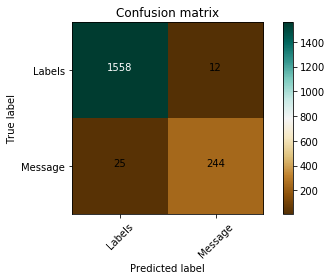

In [32]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

## Support Vector Classifier

In [33]:
from sklearn.svm import SVC

In [34]:
msg_svc = SVC(C=.6)
msg_svc.fit(X_train,Y_train)
Y_predict = msg_svc.predict(X_test)
print('Accuracy of model is :')
print(accuracy_score(Y_predict,Y_test))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of model is :
0.8607939097335509


Confusion matrix, without normalization
[[1583  256]
 [   0    0]]


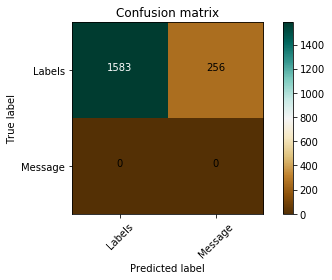

In [35]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

In [36]:
Models.append('SVC')
ACC.append(accuracy_score(Y_predict,Y_test))

### K Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
msg_KNN = KNeighborsClassifier()
msg_KNN.fit(X_train,Y_train)
Y_predict = msg_KNN.predict(X_test)
print('accuracy score of this model is :')
print(accuracy_score(Y_predict,Y_test))
print(confusion_matrix(Y_predict,Y_test))

accuracy score of this model is :
0.8917890157694399
[[1583  199]
 [   0   57]]


Confusion matrix, without normalization
[[1583  199]
 [   0   57]]


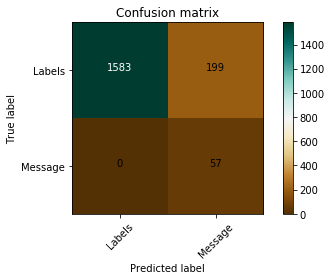

In [39]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

In [40]:
Models.append('KNN')
ACC.append(accuracy_score(Y_predict,Y_test))

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_predict = RFC.predict(X_test)
print('accuracy score of this model is :')
print(accuracy_score(Y_predict,Y_test))
print(confusion_matrix(Y_predict,Y_test))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score of this model is :
0.9603045133224578
[[1583   73]
 [   0  183]]


Confusion matrix, without normalization
[[1583   73]
 [   0  183]]


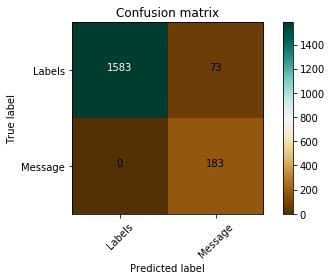

In [43]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

In [44]:
Models.append('Random Forest Cassifier')
ACC.append(accuracy_score(Y_predict,Y_test))

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,Y_train)
Y_predict = ABC.predict(X_test)
print('accuracy score of this model is :')
print(accuracy_score(Y_predict,Y_test))
print(confusion_matrix(Y_predict,Y_test))

accuracy score of this model is :
0.9679173463839043
[[1571   47]
 [  12  209]]


Confusion matrix, without normalization
[[1571   47]
 [  12  209]]


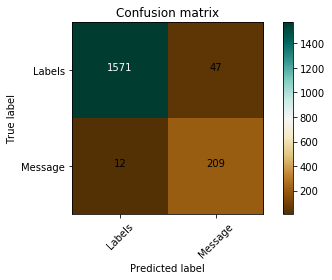

In [49]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

In [50]:
Models.append('AdaBoost Classifier')
ACC.append(accuracy_score(Y_predict,Y_test))

### Ploting accuracy of each model against their Names

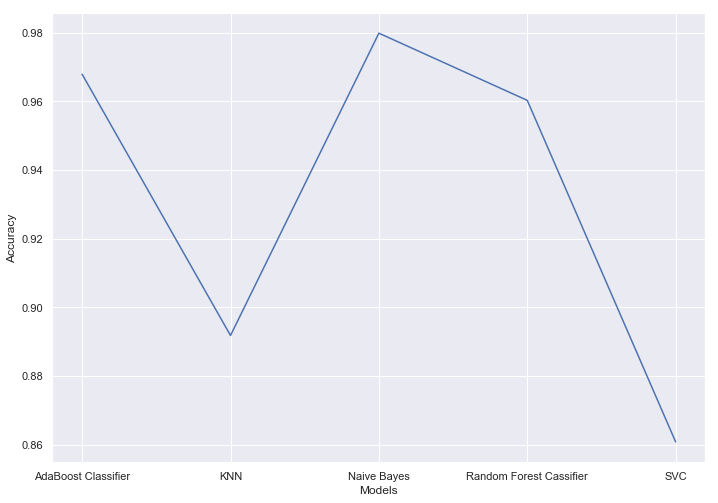

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(y=ACC,x=Models,)
g.set(xlabel='Models',ylabel='Accuracy')
plt.show()

## Summary

1. There are more no of Ham present compared to spam
2. From histogram plot we can see that most of spam are have high word count than ham
3. Since word count in each message also show features importance we also add word count features
4. Removing puntuation from message feature
5. Applying CountVectorizer and TF-IDF to tokeniz the message feature
6. Training and Testing each model to find its accuracy 
7. Finally we conclude that Naive Bayes has highest Accuracy compared to other features